# Outlier Detection

### Univariate Methods

##### Interquartile Range (IQR) Method

The Interquartile Range (IQR) method defines outliers as data points that fall below or above certain thresholds, calculated from the first and third quartiles $Q_1$ and $Q_3$:

$$
\text{IQR} = Q_3 - Q_1
$$

Outliers are defined as:

$$
x < Q_1 - 1.5 \times \text{IQR} \quad \text{or} \quad x > Q_3 + 1.5 \times \text{IQR}
$$

##### Z-Score Method

The Z-score method identifies outliers based on the number of standard deviations an observation is away from the mean. It is defined as:

$$
Z = \frac{x - \mu}{\sigma}
$$

Where:
- $\mu$ is the mean of the data
- $\sigma$ is the standard deviation of the data

Outliers are defined as:

$$
|Z| > 3
$$

##### Hampel Filter (MAD Method)

The Hampel filter uses the **Median Absolute Deviation (MAD)** for robust outlier detection:

$$
\text{MAD} = \text{median}(|x_i - \text{median}(x)|)
$$

Outliers are defined as:

$$
|x_i - \text{median}(x)| > k \times \text{MAD}
$$

Where $k$ is typically set to 3 for outlier detection.

Processing Dataset: Normal Distribution
Processing Dataset: Uniform Distribution
Processing Dataset: Exponential Distribution
                    Dataset   Method  Precision  Recall  F1 Score
0       Normal Distribution      IQR   0.000000     0.0  0.000000
1       Normal Distribution  Z-Score   0.000000     0.0  0.000000
2       Normal Distribution   Hampel   0.500000     0.5  0.500000
3      Uniform Distribution      IQR   1.000000     0.4  0.571429
4      Uniform Distribution  Z-Score   1.000000     0.4  0.571429
5      Uniform Distribution   Hampel   1.000000     0.6  0.750000
6  Exponential Distribution      IQR   0.888889     0.8  0.842105
7  Exponential Distribution  Z-Score   1.000000     0.3  0.461538
8  Exponential Distribution   Hampel   0.454545     1.0  0.625000


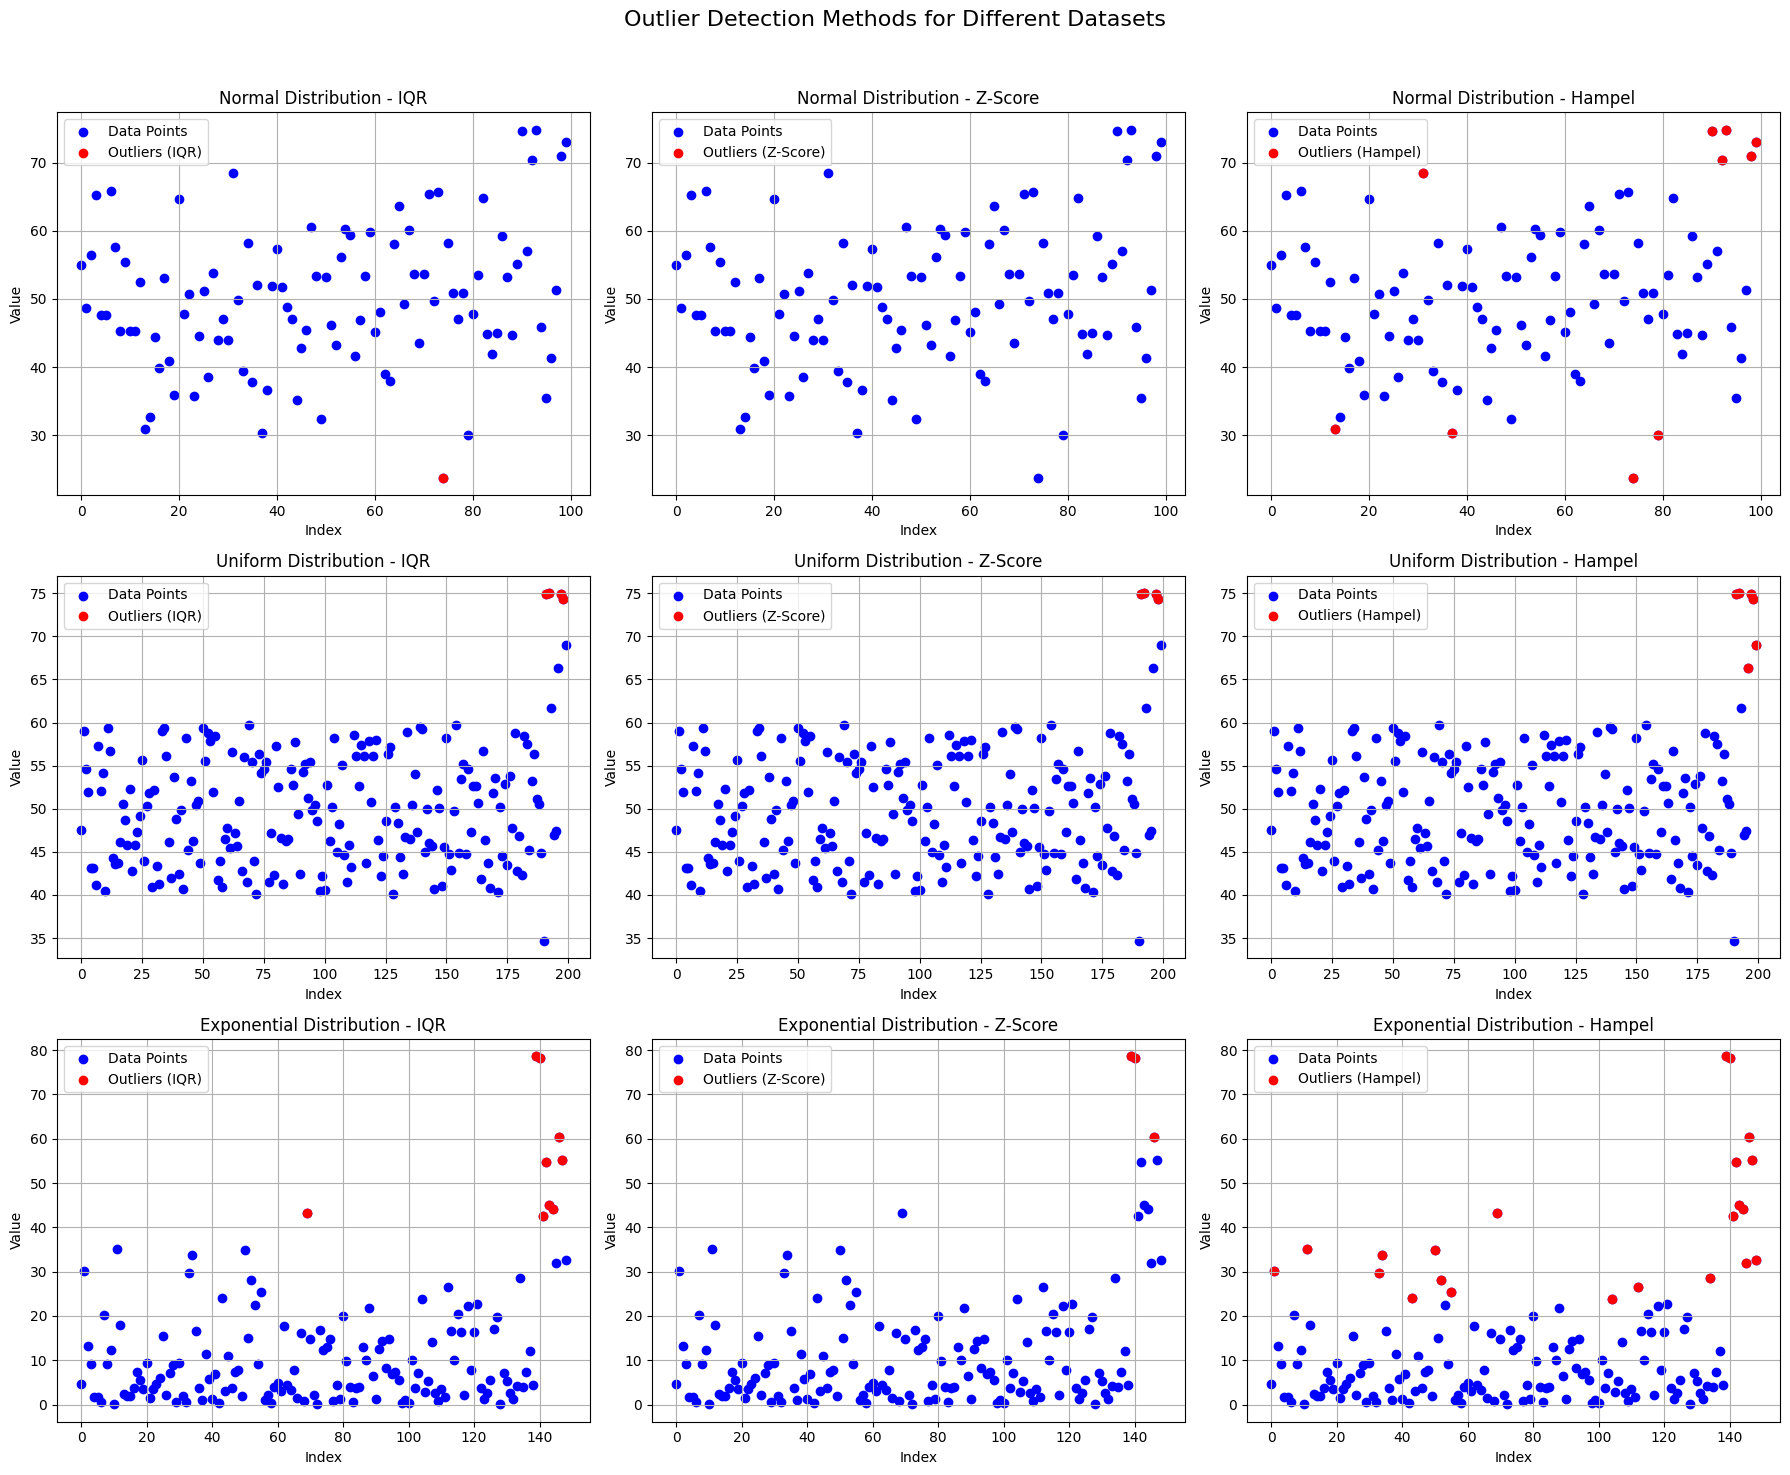

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import t

# Function to generate synthetic data
def generate_data(N=105, outlier_percentage=5, distribution='normal'):
    np.random.seed(42)
    
    # Normal data generation
    if distribution == 'normal':
        data_normal = np.random.normal(50, 10, size=int(N * (1 - outlier_percentage / 100)))
    elif distribution == 'uniform':
        data_normal = np.random.uniform(40, 60, size=int(N * (1 - outlier_percentage / 100)))
    elif distribution == 'exponential':
        data_normal = np.random.exponential(10, size=int(N * (1 - outlier_percentage / 100)))
    
    # Outlier data (uniformly distributed)
    data_outliers = np.random.uniform(low=30, high=80, size=int(N * outlier_percentage / 100))
    
    # Combine normal and outlier data
    data = np.concatenate([data_normal, data_outliers])
    true_labels = np.array([0] * len(data_normal) + [1] * len(data_outliers))  # 0 for normal, 1 for outliers
    
    return data, true_labels

# Univariate Outlier Detection Methods

### 1. **Interquartile Range (IQR) Method**
def iqr_method(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    return (data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)

### 2. **Z-Score Method**
def z_score_method(data, threshold=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    return np.abs(z_scores) > threshold

### 3. **Hampel Filter (MAD Method)**
def hampel_filter(data, k=3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    return np.abs(data - median) > k * mad

# Apply methods to one feature and a variety of datasets
datasets = [
    {"name": "Normal Distribution", "distribution": "normal", "N": 100, "outlier_percentage": 10},
    {"name": "Uniform Distribution", "distribution": "uniform", "N": 200, "outlier_percentage": 5},
    {"name": "Exponential Distribution", "distribution": "exponential", "N": 150, "outlier_percentage": 7},
]

# Store results for each dataset
validation_results = []

for dataset in datasets:
    print(f"Processing Dataset: {dataset['name']}")
    
    # Generate the data for the current dataset
    data, true_labels = generate_data(N=dataset["N"], outlier_percentage=dataset["outlier_percentage"], distribution=dataset["distribution"])
    
    # Apply Univariate Methods
    outliers_iqr = iqr_method(data)
    outliers_zscore = z_score_method(data)
    outliers_hampel = hampel_filter(data)
    
    # Store results
    methods = {
        "IQR": outliers_iqr,
        "Z-Score": outliers_zscore,
        "Hampel": outliers_hampel
    }
    
    # Compute validation metrics for each method
    for method_name, predicted_outliers in methods.items():
        precision = precision_score(true_labels, predicted_outliers)
        recall = recall_score(true_labels, predicted_outliers)
        f1 = f1_score(true_labels, predicted_outliers)
        
        validation_results.append({
            "Dataset": dataset["name"],
            "Method": method_name,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

# Display Validation Metrics
validation_df = pd.DataFrame(validation_results)
print(validation_df)

# Plotting results for all datasets and methods in a single 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Outlier Detection Methods for Different Datasets", fontsize=16)
axs = axs.flatten()

# Iterate through datasets and methods, and plot them in the grid
for i, dataset in enumerate(datasets):
    data, true_labels = generate_data(N=dataset["N"], outlier_percentage=dataset["outlier_percentage"], distribution=dataset["distribution"])
    
    methods = {
        "IQR": iqr_method(data),
        "Z-Score": z_score_method(data),
        "Hampel": hampel_filter(data)
    }

    for j, (method_name, outliers) in enumerate(methods.items()):
        ax_index = i * 3 + j  # Calculate the index for the 3x3 grid

        # Scatter plot for data points
        axs[ax_index].scatter(range(len(data)), data, label='Data Points', color='blue')
        
        # Plot detected outliers in red
        outlier_indices = np.where(outliers)[0]
        axs[ax_index].scatter(outlier_indices, data[outlier_indices], color='red', label=f'Outliers ({method_name})')
        
        axs[ax_index].set_title(f'{dataset["name"]} - {method_name}')
        axs[ax_index].set_xlabel('Index')
        axs[ax_index].set_ylabel('Value')
        axs[ax_index].legend()
        axs[ax_index].grid()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Multivariate Methods

### 1. **Mahalanobis Distance**

Mahalanobis Distance measures how far a point is from the mean, accounting for correlations between variables.

$$
D_M(\mathbf{x}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^\top \mathbf{S}^{-1} (\mathbf{x} - \boldsymbol{\mu})}
$$

Where:
- $\mathbf{x}$ is the data point.
- $\boldsymbol{\mu}$ is the mean vector.
- $\mathbf{S}$ is the covariance matrix.

Points with large distances are outliers. The threshold for detecting outliers is based on the chi-squared distribution, where the Mahalanobis distance squared follows a chi-squared distribution with degrees of freedom equal to the number of variables:

$$
D_M^2(\mathbf{x}) \sim \chi^2_k
$$

Where $k$ is the number of variables (dimensions). Outliers are detected if the squared Mahalanobis distance exceeds a critical value from the chi-squared distribution for a given significance level, typically $0.05$ or $0.01$.

#### **Algorithm (Pseudo Code)**:
```plaintext
1. Calculate the mean vector μ for the dataset
2. Calculate the covariance matrix S
3. For each data point x:
   a. Compute the Mahalanobis distance D_M(x)
      D_M(x) = sqrt((x - μ)ᵀ * S⁻¹ * (x - μ))
4. Compare D_M(x) with the chi-squared critical value for the given significance level
   a. If D_M(x) > critical_value, then x is an outlier
```

### 2. **Local Outlier Factor (LOF)**

LOF compares the density of a point to its neighbors to identify outliers.

$$
LOF(p) = \frac{\sum_{q \in N_k(p)} \frac{\text{lrd}(q)}{\text{lrd}(p)}}{|N_k(p)|}
$$

Where:
- $N_k(p)$ is the $k$-nearest neighbors of point $p$.
- $\text{lrd}(p)$ is the local reachability density.

Points with a significantly lower density than their neighbors are outliers.

#### **Algorithm (Pseudo Code)**:
```plaintext
1. For each point p in the dataset:
   a. Find the k-nearest neighbors N_k(p) of point p
   b. Calculate the local reachability density (lrd) for point p
      lrd(p) = 1 / Σq∈N_k(p) dist(p, q)
   c. For each point q in N_k(p), compute its local reachability density lrd(q)
2. Calculate the LOF score for each point p:
   LOF(p) = Σq∈N_k(p) (lrd(q) / lrd(p)) / |N_k(p)|
3. Points with a LOF score significantly higher than 1 are outliers
```

### 3. **Isolation Forest**

Isolation Forest isolates observations by randomly selecting features and splitting the data. Outliers are isolated with fewer splits.

$$
\text{Anomaly Score} = 2^{-E(h(x))/c(n)}
$$

Where:
- $E(h(x))$ is the average path length.
- $c(n)$ is the expected path length for random data.

Points with shorter path lengths are outliers.

#### **Algorithm (Pseudo Code)**:
```plaintext
1. Build an Isolation Forest:
   a. Randomly select a feature and a split value for each tree
   b. Recursively partition the dataset based on random splits until isolation is achieved
2. For each point x, calculate its anomaly score:
   a. Compute the path length h(x) from the root to the leaf where x is isolated
   b. Calculate the average path length E(h(x)) over all trees
3. Calculate the anomaly score:
   Anomaly_Score(x) = 2^(-E(h(x))/c(n))
4. Points with a higher anomaly score are considered outliers
```

### Conclusion

- **Mahalanobis Distance**: Best for Gaussian data where the covariance structure is important.
- **LOF**: Effective for detecting local outliers, especially in datasets with varying densities.
- **Isolation Forest**: Suitable for high-dimensional datasets, as it isolates outliers efficiently using random splits.

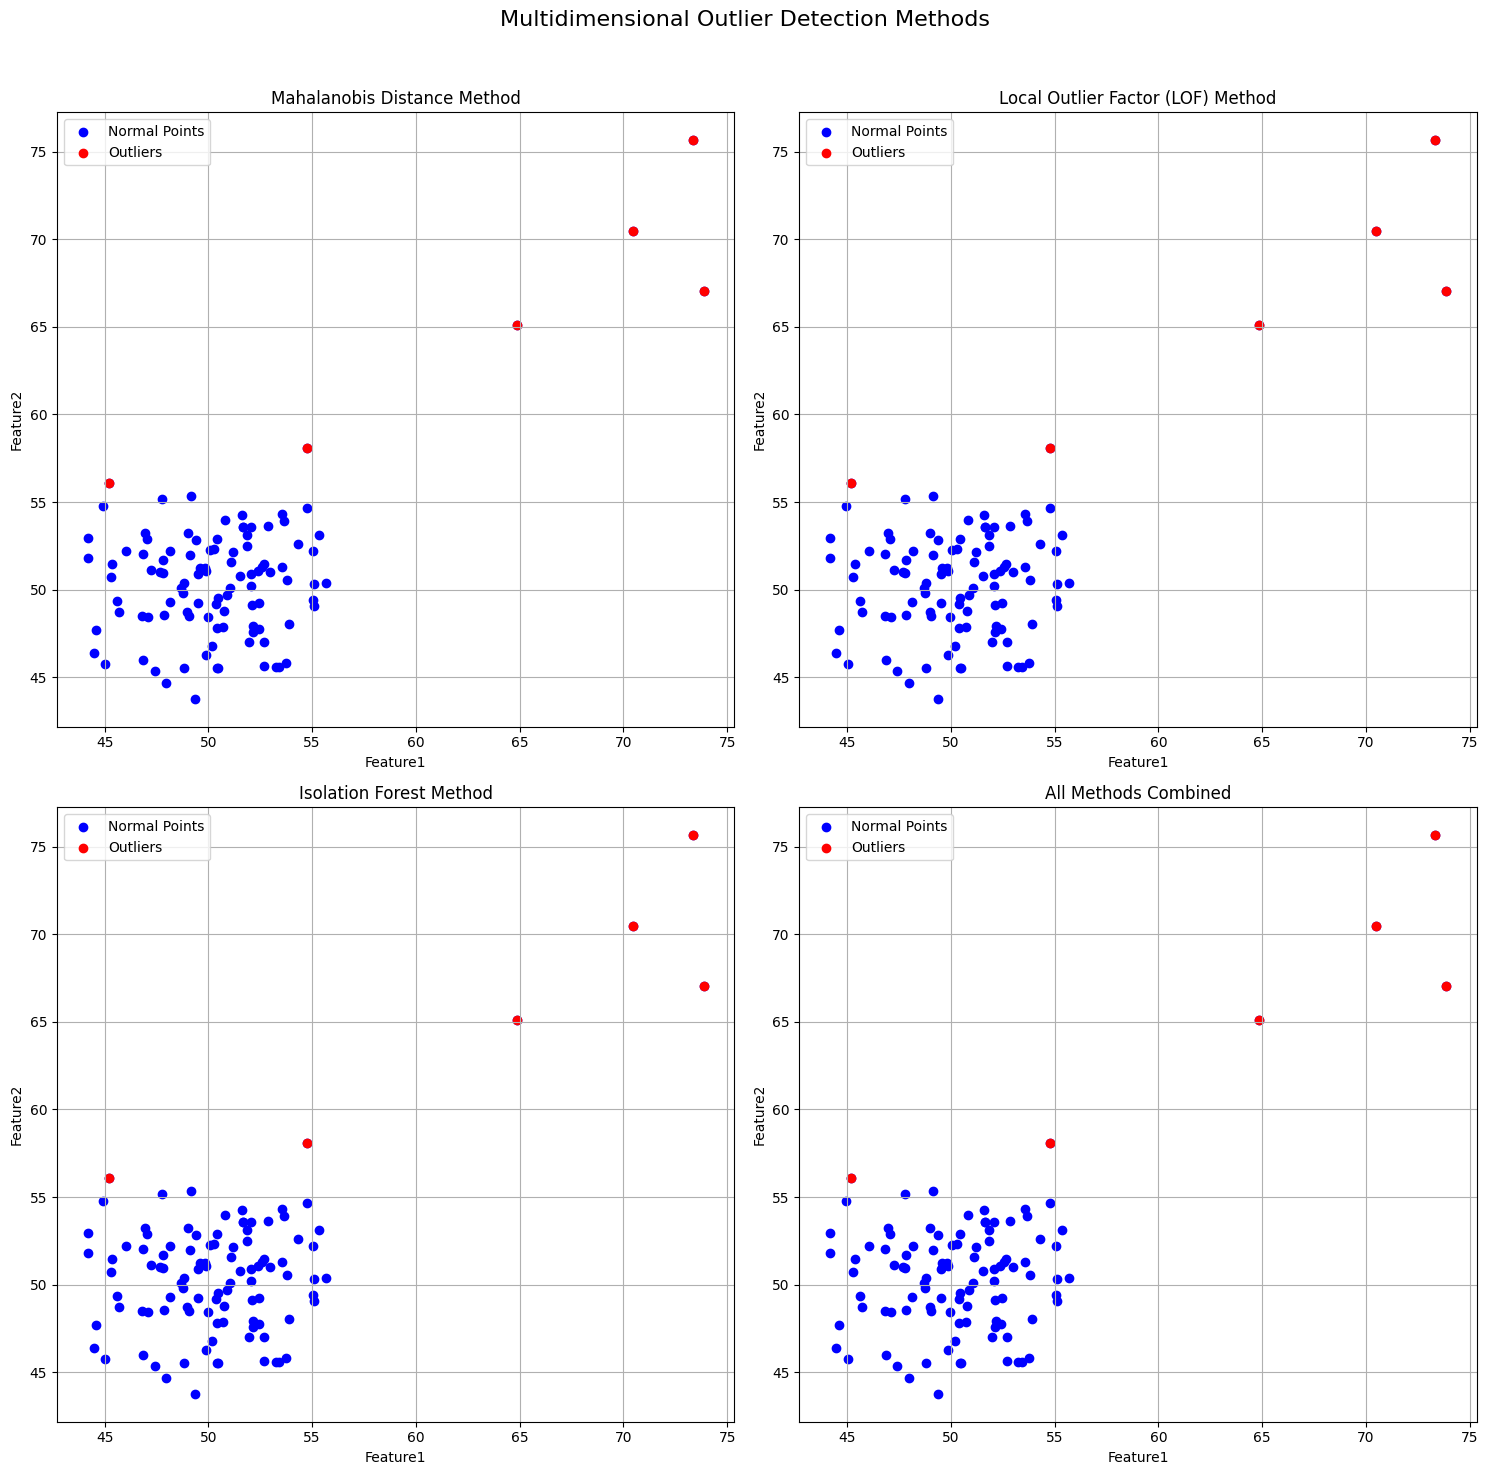

                       Method  Precision  Recall  F1 Score
0        Mahalanobis Distance   0.666667     0.8  0.727273
1  Local Outlier Factor (LOF)   0.666667     0.8  0.727273
2            Isolation Forest   0.666667     0.8  0.727273


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import t

# Generate a 2D dataset with outliers
np.random.seed(42)
data_normal = np.random.multivariate_normal([50, 50], [[10, 2], [2, 10]], size=100)
data_outliers = np.random.uniform(low=30, high=80, size=(5, 2))
data_2d = np.vstack([data_normal, data_outliers])
true_labels_2d = np.array([0] * 100 + [1] * 5)  # 0 for normal, 1 for outliers (ground truth)

# Convert to DataFrame
df_2d = pd.DataFrame(data_2d, columns=['Feature1', 'Feature2'])

# Method 1: Mahalanobis Distance (using Elliptic Envelope)
ee = EllipticEnvelope(contamination=0.05, random_state=42)
df_2d['Outlier_Mahalanobis'] = ee.fit_predict(data_2d)
df_2d['Outlier_Mahalanobis'] = df_2d['Outlier_Mahalanobis'] == -1

# Method 2: Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers = lof.fit_predict(data_2d)
df_2d['Outlier_LOF'] = lof_outliers == -1

# Method 3: Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_2d['Outlier_IsolationForest'] = iso_forest.fit_predict(data_2d)
df_2d['Outlier_IsolationForest'] = df_2d['Outlier_IsolationForest'] == -1

# Combine methods into a dictionary for plotting
methods_2d = {
    "Mahalanobis Distance": df_2d['Outlier_Mahalanobis'],
    "Local Outlier Factor (LOF)": df_2d['Outlier_LOF'],
    "Isolation Forest": df_2d['Outlier_IsolationForest']
}

# Plot each method's results
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Multidimensional Outlier Detection Methods", fontsize=16)
axs = axs.flatten()

for i, (method_name, outliers) in enumerate(methods_2d.items()):
    axs[i].scatter(df_2d['Feature1'], df_2d['Feature2'], label='Normal Points', c='blue')
    axs[i].scatter(df_2d[outliers]['Feature1'], df_2d[outliers]['Feature2'], label='Outliers', c='red')
    axs[i].set_title(f'{method_name} Method')
    axs[i].set_xlabel('Feature1')
    axs[i].set_ylabel('Feature2')
    axs[i].legend()
    axs[i].grid()

# Add the combined results to the last plot
combined_outliers = np.logical_or.reduce([outliers for outliers in methods_2d.values()])
axs[-1].scatter(df_2d['Feature1'], df_2d['Feature2'], label='Normal Points', c='blue')
axs[-1].scatter(df_2d[combined_outliers]['Feature1'], df_2d[combined_outliers]['Feature2'], label='Outliers', c='red')
axs[-1].set_title("All Methods Combined")
axs[-1].set_xlabel('Feature1')
axs[-1].set_ylabel('Feature2')
axs[-1].legend()
axs[-1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Compute Validation Metrics for Each Method
validation_results_2d = []
for method_name, predicted_outliers in methods_2d.items():
    precision = precision_score(true_labels_2d, predicted_outliers)
    recall = recall_score(true_labels_2d, predicted_outliers)
    f1 = f1_score(true_labels_2d, predicted_outliers)
    validation_results_2d.append({
        "Method": method_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Display Validation Metrics
validation_df_2d = pd.DataFrame(validation_results_2d)
print(validation_df_2d)


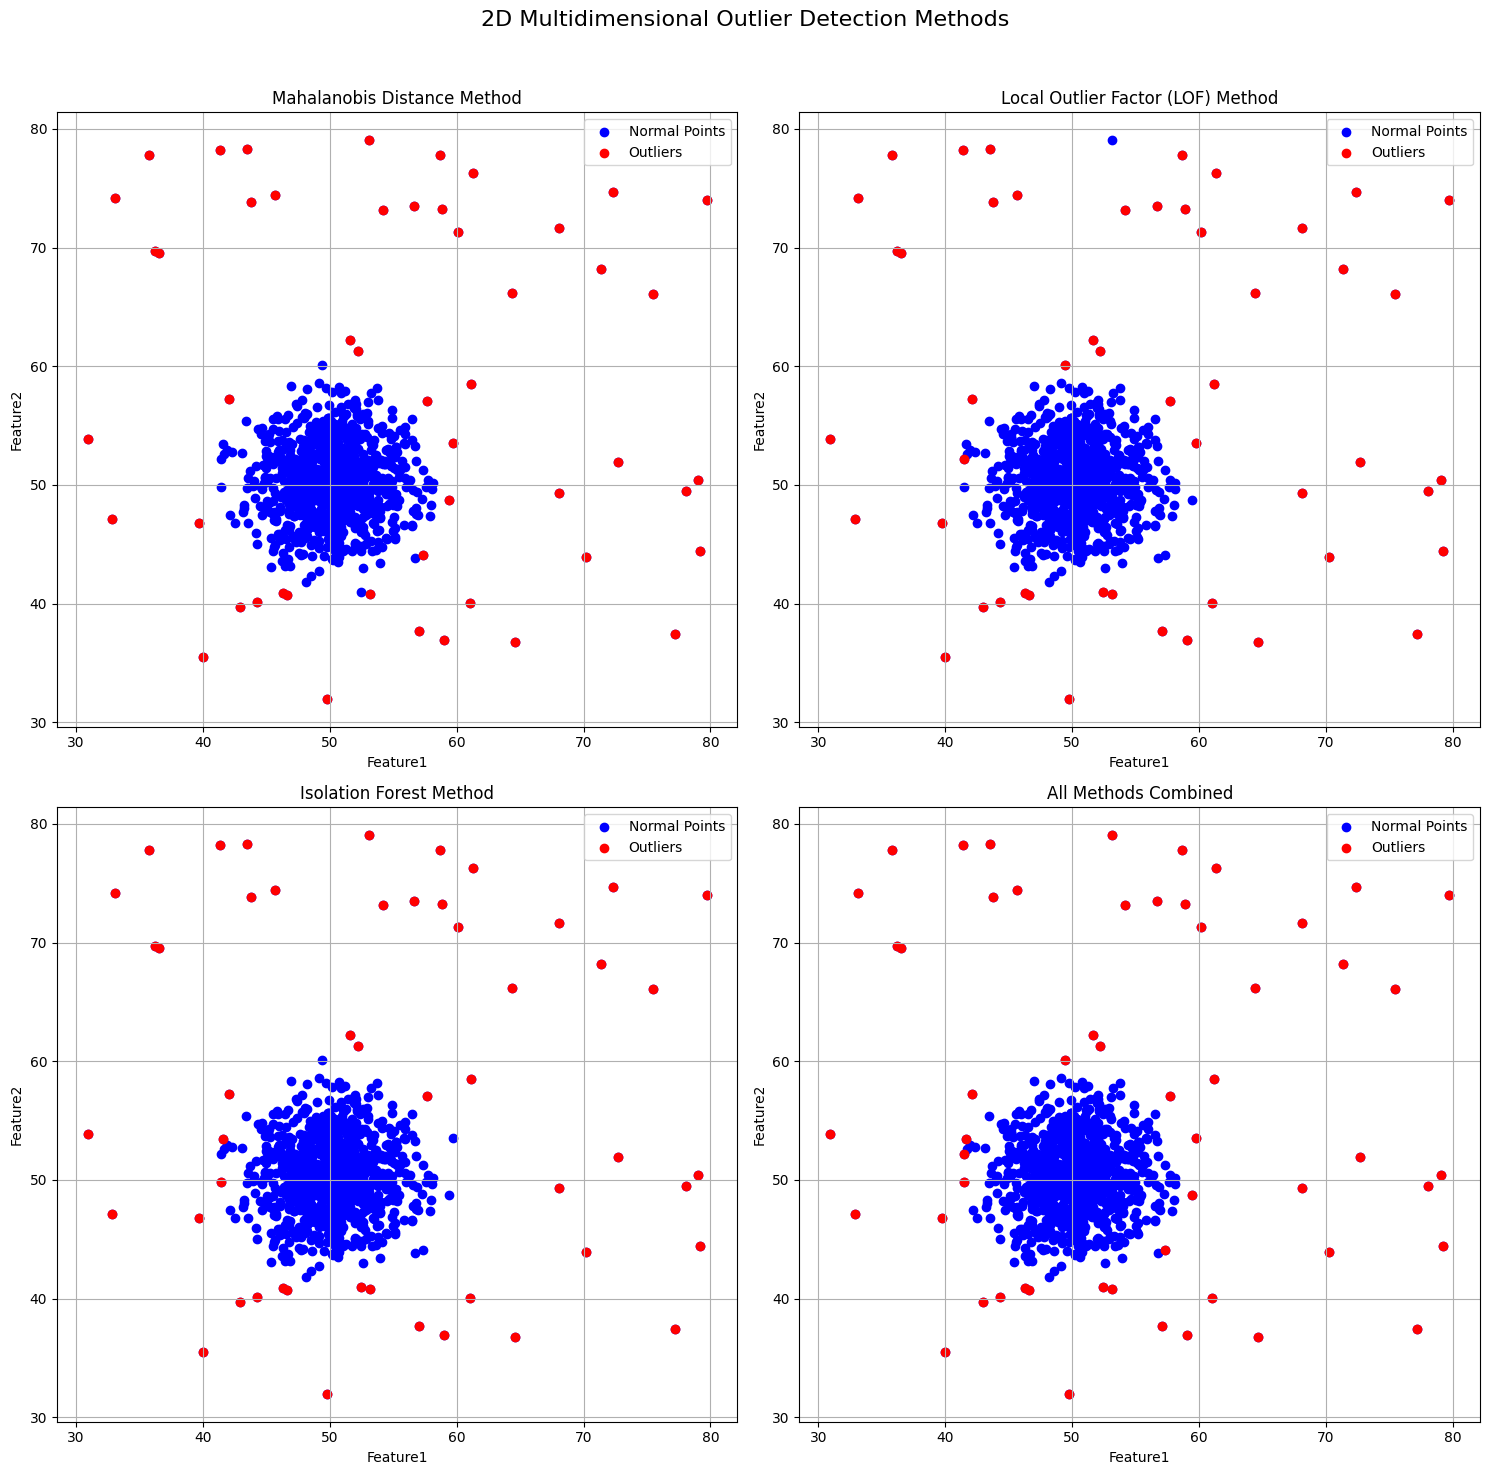

                       Method  Precision  Recall  F1 Score
0        Mahalanobis Distance       0.84    0.84      0.84
1  Local Outlier Factor (LOF)       0.80    0.80      0.80
2            Isolation Forest       0.82    0.82      0.82
                       Method  Precision  Recall  F1 Score
0        Mahalanobis Distance        0.4     1.0  0.571429
1  Local Outlier Factor (LOF)        0.4     1.0  0.571429
2            Isolation Forest        0.4     1.0  0.571429


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

def generate_data(N=105, outlier_percentage=5, dim=2):
    """
    Generate synthetic dataset with normal data and outliers.
    
    Parameters:
    - N: Total number of data points (normal + outliers)
    - outlier_percentage: Percentage of outliers in the dataset
    - dim: Number of dimensions/features
    
    Returns:
    - data: Combined normal and outlier data
    - true_labels: Ground truth labels (0 for normal, 1 for outliers)
    """
    np.random.seed(42)
    
    # Normal data (multivariate normal distribution)
    mean = [50] * dim
    cov = np.eye(dim) * 10  # covariance matrix
    data_normal = np.random.multivariate_normal(mean, cov, size=int(N * (1 - outlier_percentage / 100)))
    
    # Outlier data (uniformly distributed)
    data_outliers = np.random.uniform(low=30, high=80, size=(int(N * outlier_percentage / 100), dim))
    
    # Combine normal and outlier data
    data = np.vstack([data_normal, data_outliers])
    true_labels = np.array([0] * len(data_normal) + [1] * len(data_outliers))  # 0 for normal, 1 for outliers
    
    return data, true_labels

# Generate the 2D dataset
data_2d, true_labels_2d = generate_data(N=1000, outlier_percentage=5, dim=2)

# Convert to DataFrame
df_2d = pd.DataFrame(data_2d, columns=['Feature1', 'Feature2'])

# Method 1: Mahalanobis Distance (using Elliptic Envelope)
ee = EllipticEnvelope(contamination=0.05, random_state=42)
df_2d['Outlier_Mahalanobis'] = ee.fit_predict(data_2d)
df_2d['Outlier_Mahalanobis'] = df_2d['Outlier_Mahalanobis'] == -1

# Method 2: Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers = lof.fit_predict(data_2d)
df_2d['Outlier_LOF'] = lof_outliers == -1

# Method 3: Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_2d['Outlier_IsolationForest'] = iso_forest.fit_predict(data_2d)
df_2d['Outlier_IsolationForest'] = df_2d['Outlier_IsolationForest'] == -1

# Combine methods into a dictionary for validation
methods_2d = {
    "Mahalanobis Distance": df_2d['Outlier_Mahalanobis'],
    "Local Outlier Factor (LOF)": df_2d['Outlier_LOF'],
    "Isolation Forest": df_2d['Outlier_IsolationForest']
}

# Plot each method's results
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("2D Multidimensional Outlier Detection Methods", fontsize=16)
axs = axs.flatten()

for i, (method_name, outliers) in enumerate(methods_2d.items()):
    axs[i].scatter(df_2d['Feature1'], df_2d['Feature2'], label='Normal Points', c='blue')
    axs[i].scatter(df_2d[outliers]['Feature1'], df_2d[outliers]['Feature2'], label='Outliers', c='red')
    axs[i].set_title(f'{method_name} Method')
    axs[i].set_xlabel('Feature1')
    axs[i].set_ylabel('Feature2')
    axs[i].legend()
    axs[i].grid()

# Add the combined results to the last plot
combined_outliers = np.logical_or.reduce([outliers for outliers in methods_2d.values()])
axs[-1].scatter(df_2d['Feature1'], df_2d['Feature2'], label='Normal Points', c='blue')
axs[-1].scatter(df_2d[combined_outliers]['Feature1'], df_2d[combined_outliers]['Feature2'], label='Outliers', c='red')
axs[-1].set_title("All Methods Combined")
axs[-1].set_xlabel('Feature1')
axs[-1].set_ylabel('Feature2')
axs[-1].legend()
axs[-1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Compute Validation Metrics for Each Method (2D data)
validation_results_2d = []
for method_name, predicted_outliers in methods_2d.items():
    precision = precision_score(true_labels_2d, predicted_outliers)
    recall = recall_score(true_labels_2d, predicted_outliers)
    f1 = f1_score(true_labels_2d, predicted_outliers)
    validation_results_2d.append({
        "Method": method_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Display Validation Metrics for 2D data
validation_df_2d = pd.DataFrame(validation_results_2d)
print(validation_df_2d)

# Generate the high-dimensional dataset (e.g., 10 features)
data_highdim, true_labels_highdim = generate_data(N=1000, outlier_percentage=2, dim=100)

# Standardize the data (important for some outlier detection methods)
scaler = StandardScaler()
data_highdim_scaled = scaler.fit_transform(data_highdim)

# Method 1: Mahalanobis Distance (using Elliptic Envelope)
ee = EllipticEnvelope(contamination=0.05, random_state=42)
outliers_mahalanobis = ee.fit_predict(data_highdim_scaled)
outliers_mahalanobis = outliers_mahalanobis == -1

# Method 2: Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers = lof.fit_predict(data_highdim_scaled)
outliers_lof = lof_outliers == -1

# Method 3: Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_isoforest = iso_forest.fit_predict(data_highdim_scaled)
outliers_isoforest = outliers_isoforest == -1

# Combine methods into a dictionary for validation (High-dimensional data)
methods_highdim = {
    "Mahalanobis Distance": outliers_mahalanobis,
    "Local Outlier Factor (LOF)": outliers_lof,
    "Isolation Forest": outliers_isoforest
}

# Compute Validation Metrics for High-dimensional Methods
validation_results_highdim = []
for method_name, predicted_outliers in methods_highdim.items():
    precision = precision_score(true_labels_highdim, predicted_outliers)
    recall = recall_score(true_labels_highdim, predicted_outliers)
    f1 = f1_score(true_labels_highdim, predicted_outliers)
    validation_results_highdim.append({
        "Method": method_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Display Validation Metrics for High-dimensional data
validation_df_highdim = pd.DataFrame(validation_results_highdim)
print(validation_df_highdim)


### One Class SVM

One-Class SVM is an unsupervised learning method used for anomaly detection. Its objective is to find a hyperplane in a transformed feature space that maximally separates data points from the origin.

### Optimization Problem
The model solves:

$$
\min_{\mathbf{w}, \rho, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + \frac{1}{\nu n} \sum_{i=1}^{n} \xi_i - \rho
$$

Subject to:

$$
(\mathbf{w} \cdot \phi(\mathbf{x}_i)) \geq \rho - \xi_i, \quad \xi_i \geq 0, \forall i
$$

Where:
- $\mathbf{w}$: Weight vector defining the hyperplane.
- $\phi(\cdot)$: Kernel function mapping data to a high-dimensional space.
- $\rho$: Offset determining the boundary.
- $\xi_i$: Slack variables for soft margin.
- $\nu$: Fraction of training points allowed to be outside the boundary (controls outlier detection).

### Key Parameters
1. **Kernel Function ($\phi$)**: Defines the decision boundary (e.g., RBF, linear).
2. **$\nu$**: Adjusts the balance between false positives and tightness of the boundary.
3. **$\gamma$**: Kernel parameter influencing locality of decision boundary.

### Decision Function
For a test point $\mathbf{x}$, classify as:

$$
f(\mathbf{x}) = \text{sign}((\mathbf{w} \cdot \phi(\mathbf{x})) - \rho)
$$

- $f(\mathbf{x}) > 0$: Normal
- $f(\mathbf{x}) \leq 0$: Anomalous

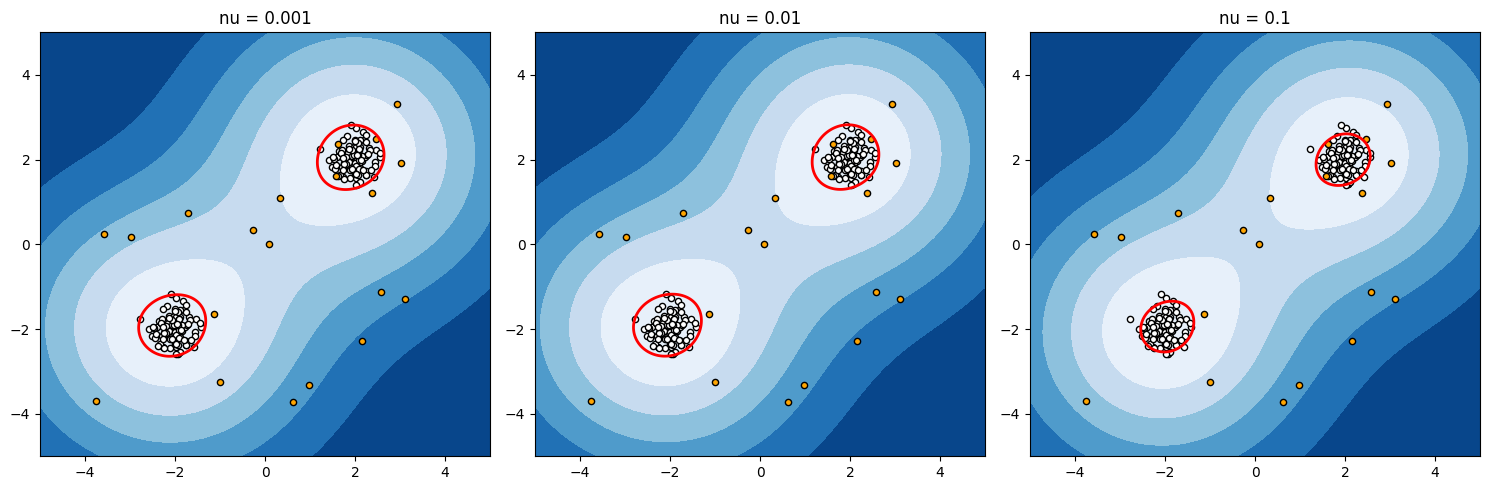

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

np.random.seed(42)
X_train = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X_train + 2, X_train - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

parameters = [0.001, 0.01, 0.1]

for ax, nu in zip(axes, parameters):
    clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=nu)
    clf.fit(X_train)
    xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.Blues_r)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
    ax.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
    ax.scatter(X_outliers[:, 0], X_outliers[:, 1], c='orange', s=20, edgecolor='k')
    ax.set_title(f"nu = {nu}")
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))

plt.tight_layout()
plt.show()
